In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import os
import sys
import shutil
from glob import glob

In [3]:
import numpy as np

In [4]:
try:
    lock
except:
    %cd ..
    CUR_DIR = os.getcwd()
    lock = 'Locked'
CUR_DIR

/home/ubuntu/p/fast-ai


'/home/ubuntu/p/fast-ai'

# Aims
1. Train linear model on VGG16 output to predict cat vs dogs
2. Replace final dense layer of VGG16 to predict
3. Fine-Train dense VGG16 layers
4. Fine-Train whole of VGG16 network

In [5]:
DATA_PATH = CUR_DIR + '/data/cats_dogs/'; print(DATA_PATH)
SAMPLE_PATH = DATA_PATH + 'sample/'; print(SAMPLE_PATH)
SPLIT_PATHS = ['train/','val/','test/']
CREATE_DATA_SETS = False

/home/ubuntu/p/fast-ai/data/cats_dogs/
/home/ubuntu/p/fast-ai/data/cats_dogs/sample/


# Get and setup of data structure

Setup kaggle-cli config

In [6]:
!kg config -u "dbcerigo" -c "dogs-vs-cats-redux-kernels-edition"

In [7]:
if not os.path.isdir(DATA_PATH):
    os.mkdir(DATA_PATH)
    %cd {DATA_PATH}
    !kg download
    !unzip -qn test.zip    
    !unzip -qn train.zip
    os.mkdir(DATA_PATH+'val')
if not os.path.isdir(SAMPLE_PATH):
    os.mkdir(SAMPLE_PATH)
    for path in SPLIT_PATHS:
        os.mkdir(SAMPLE_PATH+SAMPLE_PATH+path)

In [8]:
ls test

ls: cannot access 'test': No such file or directory


In [9]:
%cd {DATA_PATH}
# test size
!ls -1 train | wc -l # post creating data should output 2 (cats, dogs)
# train size
!ls -1 test | wc -l # post creating data should output 1 (unknown)

/home/ubuntu/p/fast-ai/data/cats_dogs
2
1


In [10]:
!ls {DATA_PATH}
!ls sample

sample	sample_submission.csv  test  train  val
test  train  val


In [11]:
if CREATE_DATA_SETS: 
    !rm  {DATA_PATH}test.zip
    !rm  {DATA_PATH}train.zip

### FIRST, seperate off a val set (do first to avoid leaks etc.)

In [12]:
%cd train

/home/ubuntu/p/fast-ai/data/cats_dogs/train


In [13]:
im_paths = glob('*.jpg')
im_paths[:1]

[]

In [14]:
im_paths = np.random.permutation(im_paths)
if CREATE_DATA_SETS: 
    for i in range(2000): os.rename(im_paths[i], DATA_PATH+'val/'+im_paths[i])

#### Move sample parts

In [15]:
%cd {DATA_PATH}train
im_paths = glob('*.jpg') #get new paths list as don't want to ones that are in val
im_paths = np.random.permutation(im_paths)
if CREATE_DATA_SETS:
    for i in range(100): shutil.copyfile(im_paths[i], SAMPLE_PATH+'train/'+im_paths[i]) 

/home/ubuntu/p/fast-ai/data/cats_dogs/train


In [16]:
im_paths = np.random.permutation(im_paths)
if CREATE_DATA_SETS:
    for i in range(10): shutil.copyfile(im_paths[i], SAMPLE_PATH+'val/'+im_paths[i]) 

In [17]:
%cd {DATA_PATH}test
im_paths = glob('*.jpg') 
im_paths = np.random.permutation(im_paths)
if CREATE_DATA_SETS:
    for i in range(20): shutil.copyfile(im_paths[i], SAMPLE_PATH+'test/'+im_paths[i]) 
%cd {DATA_PATH}

/home/ubuntu/p/fast-ai/data/cats_dogs/test
/home/ubuntu/p/fast-ai/data/cats_dogs


In [18]:
%cd {DATA_PATH}
# test size
!ls -1 test | wc -l
# train size
!ls -1 train | wc -l
!ls -R sample

/home/ubuntu/p/fast-ai/data/cats_dogs
1
2
sample:
test  train  val

sample/test:
unknown

sample/test/unknown:
1387.jpg  2586.jpg  3801.jpg  4913.jpg	6195.jpg  8152.jpg  9078.jpg
1633.jpg  272.jpg   4402.jpg  5071.jpg	6778.jpg  8723.jpg  9290.jpg
1940.jpg  3180.jpg  4559.jpg  5241.jpg	7691.jpg  8856.jpg

sample/train:
cats  dogs

sample/train/cats:
cat.10506.jpg  cat.1852.jpg  cat.3930.jpg  cat.6134.jpg  cat.833.jpg
cat.10827.jpg  cat.2032.jpg  cat.4018.jpg  cat.6267.jpg  cat.8531.jpg
cat.11293.jpg  cat.2071.jpg  cat.4108.jpg  cat.633.jpg	 cat.8691.jpg
cat.1138.jpg   cat.2102.jpg  cat.4410.jpg  cat.6383.jpg  cat.9080.jpg
cat.11511.jpg  cat.219.jpg   cat.4459.jpg  cat.6420.jpg  cat.9152.jpg
cat.11559.jpg  cat.221.jpg   cat.4929.jpg  cat.7076.jpg  cat.9368.jpg
cat.1171.jpg   cat.247.jpg   cat.5107.jpg  cat.7203.jpg  cat.9404.jpg
cat.11733.jpg  cat.3067.jpg  cat.5122.jpg  cat.7205.jpg  cat.9750.jpg
cat.12041.jpg  cat.3120.jpg  cat.5277.jpg  cat.8216.jpg  cat.9800.jpg
cat.12131.jpg  cat.32

In [19]:
def make_move_class_files(path):
    targer_dir =path.split('/')[-2]
    assert targer_dir == 'train' or targer_dir == 'val'
    %cd {path}
    %mkdir cats
    %mkdir dogs
    %mv cat.*.jpg cats/
    %mv dog.*.jpg dogs/

In [20]:
def make_move_test_files(path):
    assert path.split('/')[-2] == 'test'
    %cd {path}
    %mkdir unknown
    %mv *.jpg unknown/

In [21]:
if CREATE_DATA_SETS:
    make_move_class_files(SAMPLE_PATH+'train/')
    make_move_class_files(SAMPLE_PATH+'val/')
    make_move_test_files(SAMPLE_PATH+'test/')
    make_move_class_files(DATA_PATH+'train/')
    make_move_class_files(DATA_PATH+'val/')
    make_move_test_files(DATA_PATH+'test/')

In [23]:
%cd {DATA_PATH}
# test size
!ls -1 test/unknown | wc -l
# train size
!ls -1 train/cats | wc -l
!ls -1 train/dogs | wc -l
!ls -R sample

/home/ubuntu/p/fast-ai/data/cats_dogs
12500
11507
11493
sample:
test  train  val

sample/test:
unknown

sample/test/unknown:
1387.jpg  2586.jpg  3801.jpg  4913.jpg	6195.jpg  8152.jpg  9078.jpg
1633.jpg  272.jpg   4402.jpg  5071.jpg	6778.jpg  8723.jpg  9290.jpg
1940.jpg  3180.jpg  4559.jpg  5241.jpg	7691.jpg  8856.jpg

sample/train:
cats  dogs

sample/train/cats:
cat.10506.jpg  cat.1852.jpg  cat.3930.jpg  cat.6134.jpg  cat.833.jpg
cat.10827.jpg  cat.2032.jpg  cat.4018.jpg  cat.6267.jpg  cat.8531.jpg
cat.11293.jpg  cat.2071.jpg  cat.4108.jpg  cat.633.jpg	 cat.8691.jpg
cat.1138.jpg   cat.2102.jpg  cat.4410.jpg  cat.6383.jpg  cat.9080.jpg
cat.11511.jpg  cat.219.jpg   cat.4459.jpg  cat.6420.jpg  cat.9152.jpg
cat.11559.jpg  cat.221.jpg   cat.4929.jpg  cat.7076.jpg  cat.9368.jpg
cat.1171.jpg   cat.247.jpg   cat.5107.jpg  cat.7203.jpg  cat.9404.jpg
cat.11733.jpg  cat.3067.jpg  cat.5122.jpg  cat.7205.jpg  cat.9750.jpg
cat.12041.jpg  cat.3120.jpg  cat.5277.jpg  cat.8216.jpg  cat.9800.jpg
cat.121

# 1. Train linear model on VGG16 output to predict cat vs dogs

In [79]:
import keras
from keras.utils.data_utils import get_file

### On Keras model weights

* Model weights can be considered seperate from model
* Model is just a DAG, a set of operations (or flow) on a tensor, where the actual values are not yet defined - these are the weights (the types and shapes etc. are defined)
* Keras uses `keras.utils.data_utils.get_file` to do lazy downloading and caching of files (such as model weights)
    - Default cache locations is `~/.keras/models/`, but better for us to have it in EBS so don't have to redownload each time
  
  
* Good overview of keras Model api https://keras.io/models/about-keras-models/ including `model.set_weights(weights)`
* Includes good stuff on saving and loading weights https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [55]:
# download weights for VGG16 but cache to our models dir
MODEL_PATH = CUR_DIR + '/model/'
KERAS_MODEL_URL = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/'
FULL_VGG_WEIGHTS_NAME = 'vgg16_weights_tf_dim_ordering_tf_kernels.h5'
NOTOP_VGG_WEIGHTS_NAME = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [56]:
full_weights_path = get_file(FULL_VGG_WEIGHTS_NAME, KERAS_MODEL_URL+FULL_VGG_WEIGHTS_NAME, cache_subdir=MODEL_PATH)

In [57]:
notop_weights_path = get_file(NOTOP_VGG_WEIGHTS_NAME, KERAS_MODEL_URL+NOTOP_VGG_WEIGHTS_NAME, cache_subdir=MODEL_PATH)

In [60]:
# need bigger instance from here so hold model in memory

In [61]:
vgg = keras.applications.vgg16.VGG16(include_top=True, weights=None,
                               input_tensor=None, input_shape=None,
                               pooling=None, classes=1000)
#read the source code of stuff if it seems mysterious to you

In [62]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [63]:
# use image net weights
vgg.load_weights(full_weights_path)

### Make Training Image Generator

In [188]:
from keras.preprocessing.image import ImageDataGenerator
from math import ceil

In [189]:
img_gen = ImageDataGenerator()
# can add a ton of params here to add automated augmentation to the images it feeds

https://keras.io/preprocessing/image/
* check my sneaky `nb_batches` which I can use for setting number of steps per epoch
# NOTE:
* Think that adding shuffle shifts the data order but not the labels?...

In [229]:
train_gen = img_gen.flow_from_directory(DATA_PATH+'train/',
                                      target_size= (224,224), # this should match the input layer size
                                      color_mode='rgb', # alternative is 'grayscale'
                                      classes=None, # will infere them from directory structure
                                      class_mode='categorical',
                                      batch_size=200, # default is 32
                                      shuffle=False,
                                      seed=2017 # for reproducing
                                     )
train_gen.nb_batches = int(ceil(train_gen.samples / train_gen.batch_size))
train_gen.class_indices

Found 23000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [230]:
next(train_gen)[1]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,

In [191]:
val_gen = img_gen.flow_from_directory(DATA_PATH+'val/',
                                      target_size= (224,224), # this should match the input layer size
                                      color_mode='rgb', # alternative is 'grayscale'
                                      classes=None, # will infere them from directory structure
                                      class_mode='categorical',
                                      batch_size=124, # default is 32
                                      shuffle=False,
                                      seed=2017 # for reproducing
                                     )
val_gen.nb_batches = int(ceil(val_gen.samples / val_gen.batch_size))
val_gen.nb_batches

Found 2000 images belonging to 2 classes.


17

## Checking CPU/GPU usage
* check CPU usage `htop`
* check GPU usage `watch -n1 nvidia-smi`

In [192]:
# get devices tensorflow sees
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13193129690101296304
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 292945920
locality {
  bus_id: 1
}
incarnation: 8828759571952064255
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0"
]


try some predictions

In [193]:
vgg.predict_generator(train_gen, steps=1)

array([[  3.47573770e-09,   2.62655830e-09,   2.23767649e-09, ...,
          1.18900306e-10,   7.28344105e-07,   5.36811240e-05],
       [  6.83440078e-08,   2.40387209e-07,   2.09702739e-06, ...,
          2.61103494e-08,   1.01854812e-05,   1.26359714e-02],
       [  7.72301778e-09,   1.17497791e-06,   2.33668329e-09, ...,
          1.85848748e-09,   6.83887556e-05,   6.26146502e-05],
       ..., 
       [  1.03693338e-07,   9.87976478e-07,   2.62871424e-07, ...,
          2.81841636e-07,   2.45729025e-04,   2.64674600e-05],
       [  5.78437422e-08,   5.90050331e-06,   2.05155766e-06, ...,
          3.41743487e-08,   5.03320643e-06,   5.74411126e-03],
       [  3.09904920e-07,   1.53928904e-05,   3.38501413e-05, ...,
          1.49684194e-08,   2.73647602e-04,   1.03317561e-05]], dtype=float32)

## Lets try just adding another dense softmax with 2 outputs onto our model
* This is where to read about building models https://keras.io/getting-started/sequential-model-guide/
* The model is compiled now so can't be altered
* But can take output of the model (which contains the graph of layers?) and add onto that
* And then make new model from it's input and output objects
* Don't forget to set which layers are trainable
* NOTE: using an untrain layer, and trying to fine-tune train the whole model will result in bad training
    * This is because the large and random params in the new layer will totally blow up the gradients

In [215]:
from keras.layers.core import Dense
from keras.models import Model

In [216]:
vgg_last = vgg.output
x = Dense(2, activation='softmax')(vgg_last)
v1_vgg = Model(inputs=vgg.input, outputs=x)

In [217]:
for layer in vgg.layers:
    layer.trainable = False

## Compiling Models (setting their learning processes)
* Compile is a important call - it configures it's learning process
    * https://keras.io/models/model/
* Where much of the model specifics are set
    * Optimizer
        * Learning rates etc. invovled in that optimizer
    * Model metrics
        

In [218]:
from keras.optimizers import SGD

In [219]:
sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
v1_vgg.compile(loss='categorical_crossentropy', # set the loss to optimize
               optimizer=sgd, # set optimization method
               metrics=['accuracy'] # sets metric to report (not used in computations though)
              )

In [220]:
v1_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [204]:
# NOTE: it's not smart about how big an epoch is
# you MUST specify the number of batches that will cover all samples
# that is `samples/batch_size` (annoying it can't do this by default...?)
v1_vgg_hist = v1_vgg.fit_generator(train_gen, train_gen.nb_batches, epochs=1,
                    verbose=1,
                    validation_data=val_gen, validation_steps=val_gen.nb_batches)

Epoch 1/1
155/186 [========================>.....] - ETA: 51s - loss: 0.6572 - acc: 0.6070

KeyboardInterrupt: 

In [ ]:
# Plot the history of the training

In [151]:
v1_vgg_hist.history

{'acc': [0.68293714209606771,
  0.66511032455845887,
  0.67317484240782888,
  0.67062816180680929,
  0.66171474519528839,
  0.67826822243238749,
  0.6666666413893042,
  0.67529707205922984,
  0.6502546479827479,
  0.66680811894567393],
 'loss': [0.68619533275303091,
  0.686047469314776,
  0.68623615252344228,
  0.68594373841034739,
  0.68630401711714895,
  0.68577568154585988,
  0.68573595944915555,
  0.68676247408515534,
  0.68677550867984172,
  0.68600516570241832],
 'val_acc': [0.66499998724460607,
  0.66949995291233066,
  0.66099996101856229,
  0.67299996483325963,
  0.66899997329711913,
  0.66199997210502626,
  0.67799997901916509,
  0.67699997031688686,
  0.66799997425079349,
  0.66849998021125789],
 'val_loss': [0.68648747551441192,
  0.68668375134468074,
  0.68701954841613766,
  0.68662157070636753,
  0.68675719702243809,
  0.68662935400009151,
  0.68622168576717379,
  0.68645757913589478,
  0.68677108228206629,
  0.68666307485103606]}

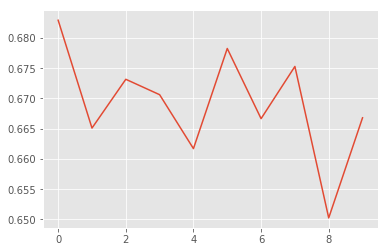

In [154]:
plt.plot(v1_vgg_hist.epoch, v1_vgg_hist.history['acc'])

## Validation
* Should make note of final scores on val set - use `model.evaluation_generator()`
* Should view...
    * Random correct sample
    * Random incorrect sample
    * Most right pred images in each class
    * Most wrong pred images in each class
    * Most unsure pred images

## Submission

In [142]:
!head {DATA_PATH}sample_submission.csv

id,label
1,0.5
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,0.5
9,0.5
